# PythonCall and C

Julia has some nice packages to include Python code into a julia program. This can be used for example to make use of Python packages for which there is no Julia equivalent yet. This used to be PyCall, but seems to move towards PythonCall

The main packages are:
- [PythonCall.jl](https://github.com/JuliaPy/PythonCall.jl)
- [CondaPkg.jl](https://github.com/JuliaPy/CondaPkg.jl)

Currently (Julia 1.10), by default a special conda install under .julia is used. The conda packages must be in the default conda environment for easy use with PyCall.

In [1]:
#Install packages if not there already
# using Pkg
# Pkg.add("PythonCall")
# Pkg.add("CondaPkg")
# CondaPkg.resolve() #initialize once

using PythonCall
using CondaPkg
using Plots

In [ ]:
# install Python packages
# CondaPkg.add("numpy")
# CondaPkg.add("matplotlib")
# CondaPkg.add("xarray")


In [2]:
# check the environment that is used
CondaPkg.status()

CondaPkg Status /home/verlaan/src_nobackup/CeleriTide.jl/CondaPkg.toml
Environment
  /home/verlaan/src_nobackup/CeleriTide.jl/.CondaPkg/env
Packages
  copernicusmarine v1.3.5
  matplotlib v3.9.1
  numpy v1.26.4
  xarray v2025.1.0
  zarr v2.18.4


In [3]:
# import Python packages
np=pyimport("numpy")
plt=pyimport("matplotlib.pyplot")
xr=pyimport("xarray")

Python: <module 'xarray' from '/home/verlaan/src_nobackup/CeleriTide.jl/.CondaPkg/env/lib/python3.11/site-packages/xarray/__init__.py'>

In [4]:
# PythonCall uses explicit conversions

x_py = pylist([3.4, 5.6])
x_jl=pyconvert(Vector,x_py)
@show x_py, x_jl
y_py=Py("hello")
y_jl=pyconvert(String,y_py)
@show y_py, y_jl
z_jl=PyArray(randn(5,5))
z_py=pyconvert(Array{Float64,2},z_jl)
@show z_jl, z_py

(x_py, x_jl) = (<py [3.4, 5.6]>, [3.4, 5.6])
(y_py, y_jl) = (<py 'hello'>, "hello")
(z_jl, z_py) = ([-0.7311569753054911 -1.9141042353458102 -1.53047149810831 -0.20539815957122984 0.9974303326641888; 0.8247460567326871 -1.2013256576192664 1.8375174646203132 0.3993559788961814 -0.5036642974309633; -0.7882677036720637 0.8455340652271823 0.4673813089171842 1.9035139197086506 1.8063479324509946; -0.34925368683909297 -0.7438302237330935 -0.25542105904117274 1.2673703751641723 0.6049789795683872; -0.21907506936314994 -0.7470088033252094 0.1436514740667711 0.08852858197892573 0.9767368625918036], [-0.7311569753054911 -1.9141042353458102 -1.53047149810831 -0.20539815957122984 0.9974303326641888; 0.8247460567326871 -1.2013256576192664 1.8375174646203132 0.3993559788961814 -0.5036642974309633; -0.7882677036720637 0.8455340652271823 0.4673813089171842 1.9035139197086506 1.8063479324509946; -0.34925368683909297 -0.7438302237330935 -0.25542105904117274 1.2673703751641723 0.6049789795683872; -0.2190

([-0.7311569753054911 -1.9141042353458102 … -0.20539815957122984 0.9974303326641888; 0.8247460567326871 -1.2013256576192664 … 0.3993559788961814 -0.5036642974309633; … ; -0.34925368683909297 -0.7438302237330935 … 1.2673703751641723 0.6049789795683872; -0.21907506936314994 -0.7470088033252094 … 0.08852858197892573 0.9767368625918036], [-0.7311569753054911 -1.9141042353458102 … -0.20539815957122984 0.9974303326641888; 0.8247460567326871 -1.2013256576192664 … 0.3993559788961814 -0.5036642974309633; … ; -0.34925368683909297 -0.7438302237330935 … 1.2673703751641723 0.6049789795683872; -0.21907506936314994 -0.7470088033252094 … 0.08852858197892573 0.9767368625918036])

In [5]:
# simple call to a package
a=π/6
sina=np.sin(a)
@show a, sina, sin(a)

# and with an array (note that arrays are column-major in Julia and row-major in Python)
b_jl=[1.0,2.0,3.0]
b=np.array(b_jl)
c=np.dot(b,b)
c_jl=pyconvert(Float64,c)
@show b_jl, c_jl, b_jl'*b_jl

# # a Plot
x=np.linspace(0,2*π,100)
y=np.sin(x)
plt.plot(x,y)
plt.show()

(a, sina, sin(a)) = (0.5235987755982988, <py 0.49999999999999994>, 0.49999999999999994)
(b_jl, c_jl, b_jl' * b_jl) = ([1.0, 2.0, 3.0], 14.0, 14.0)


Python: None

glorys_ts = <py <xarray.Dataset> Size: 167kB
Dimensions:    (depth: 22, latitude: 21, longitude: 22, time: 1)
Coordinates:
  * depth      (depth) float32 88B 0.494 1.541 2.646 3.819 ... 65.81 77.85 92.33
  * latitude   (latitude) float32 84B 53.92 54.0 54.08 ... 55.42 55.5 55.58
  * longitude  (longitude) float32 88B 2.0 2.083 2.167 2.25 ... 3.583 3.667 3.75
  * time       (time) datetime64[ns] 8B 2021-06-01
Data variables:
    sithick    (time, latitude, longitude) float64 4kB ...
    so         (time, depth, latitude, longitude) float64 81kB ...
    thetao     (time, depth, latitude, longitude) float64 81kB ...
Attributes: (12/14)
    Conventions:                   CF-1.6
    area:                          GLOBAL
    contact:                       servicedesk.cmems@mercator-ocean.eu
    credit:                        E.U. Copernicus Marine Service Information...
    dataset:                       global-reanalysis-001-030-monthly
    institution:                   Mercator Ocean
    

INFO - 2025-01-08T20:32:16Z - Dataset version was not specified, the latest one was selected: "202311"
INFO - 2025-01-08T20:32:16Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-01-08T20:32:18Z - Service was not specified, the default one was selected: "arco-time-series"


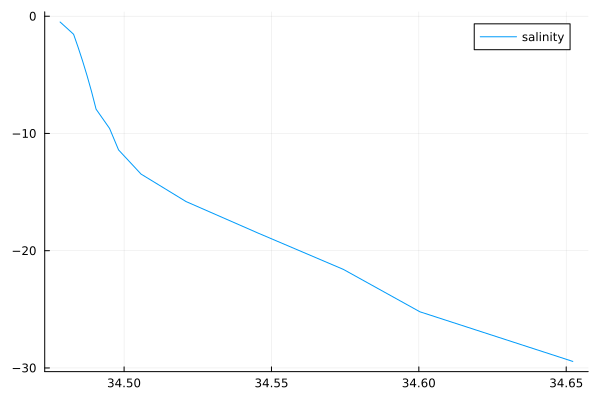

In [7]:
#Try python package for copernicusmarine
# For datasets see https://data.marine.copernicus.eu/products
# docs via https://github.com/pepijn-devries/CopernicusMarine/
# CondaPkg.add(copernicusmarine)
cm=pyimport("copernicusmarine")
# username="username"
# password="password"
# cm.login("username","password")
# Set parameters

# Load dataset
glorys_ts=cm.open_dataset(
  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1M-m",
  variables=["sithick", "so", "thetao"], 
  minimum_longitude=1.9526957350721657,
  maximum_longitude=3.7776443534524358,
  minimum_latitude=53.896796458613345,
  maximum_latitude=55.59139160425216,
  start_datetime="2021-06-01T00:00:00",
  end_datetime="2021-06-01T00:00:00",
  minimum_depth=0.49402499198913574,
  maximum_depth=100,
)

# Print loaded dataset information
@show glorys_ts

# extract data
depth=pyconvert(Vector{Float64},glorys_ts["depth"].values)
#salinity and temperature time,depth,longitude,latitiude
salinity=pyconvert(Array{Float64,4},glorys_ts["so"].values)
s_profile=salinity[1,:,1,1]
nz=findfirst(x->isnan(x),s_profile)-1
s_profile=s_profile[1:nz]
z_profile=-depth[1:nz]
plot(s_profile,z_profile,label="salinity")

In [ ]:
# using IJulia
# login=IJulia.readprompt("prompt") # is a bug in vscode
# #login=readline(stdin)